In [5]:
import numpy as np
import pandas as pd

In [6]:

MC = 1
nColumns = 11
factor = np.linspace(0,1,nColumns)

In [7]:


CN = 48
Folder = 'deltaTau/'

rmse_vec = np.zeros((nColumns,MC))
tau_los_vec = np.zeros((nColumns,MC))
tau_nLos_vec = np.zeros((nColumns,MC))
tau_los_est_vec = np.zeros((nColumns,MC))
theta_los_vec = np.zeros((nColumns,MC))
theta_nLos_vec = np.zeros((nColumns,MC))

In [8]:
for ii in range(nColumns):
    results = []
    for jj in range(MC):
        iteration = ii
        pars = np.array([CN, iteration, jj]).astype('str')
        file_results = Folder + pars[0] + '_' + pars[1] + '_' + pars[2] + '.pkl'

        results.append(pd.read_pickle(file_results))

    data_concat = pd.concat(results)

    rmse_vec[ii,:]     = data_concat['rmse']
    tau_los_vec[ii,:]  = data_concat['tau_los']
    tau_nLos_vec[ii,:] = data_concat['tau_nlos']
    theta_los_vec[ii,:]  = data_concat['theta_los']
    theta_nLos_vec[ii,:] = data_concat['theta_nlos']
    tau_los_est_vec[ii,:] = data_concat['tau_los_est']

In [10]:
import  matplotlib.pyplot as plt

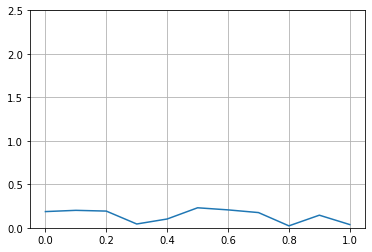

In [15]:
plt.plot(factor,rmse_vec)
plt.ylim((0,2.5))
plt.grid()
plt.show()